# Notebook 3: Bivariate Analysis

In this notebook, all categorical and numerical variables will be analized against the target variable (Alzheimer's diagnosis = categorical variable)


#### Table of contents:
* [Categorical variables vs DX](#categorical-variables)
    * [Main](#categorical-main_data)
    * [Biomarkers](#categorical-biomarker_data)
    * [Adni](#categorical-adni_data) 
* [Numerical variables vs DX](#numerical-variables)
    * [Main](#numerical-main_data)
    * [Biomarkers](#numerical-biomarker_data)
    * [Adni](#numerical-adni_data)  

## Imports

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
# Gets src path 
src_path = os.path.dirname(os.getcwd())

# Adds src_path if it doesn't exist in sys.path (to access utils)
if os.path.exists(src_path) and src_path not in sys.path:
    sys.path.append(src_path)
    
import utils.data_tools as dt
import utils.viz_tools as vt

In [3]:
# Load datasets

df_main = pd.read_csv('../data/processed/main_data.csv')
df_bm = pd.read_csv('../data/processed/biomarker_data.csv')
df_adni = pd.read_csv('../data/processed/adni_clean_data.csv')

In [4]:
palette = ['#b4d5ff', '#432786', '#9694DB', '#772183', '#C46CBE']

## Categorical variables

Comparison of target variable with the rest of categorical variables.
  
In order to have a better visual comparison, I'll use the relative frequencies in all cases.

### Categorical main_data

[Back to top](#table-of-contents)

In [5]:
main_classification = dt.classify_by_cardinality(df_main)
column_selection = main_classification.loc[main_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_main = column_selection.index.to_list()

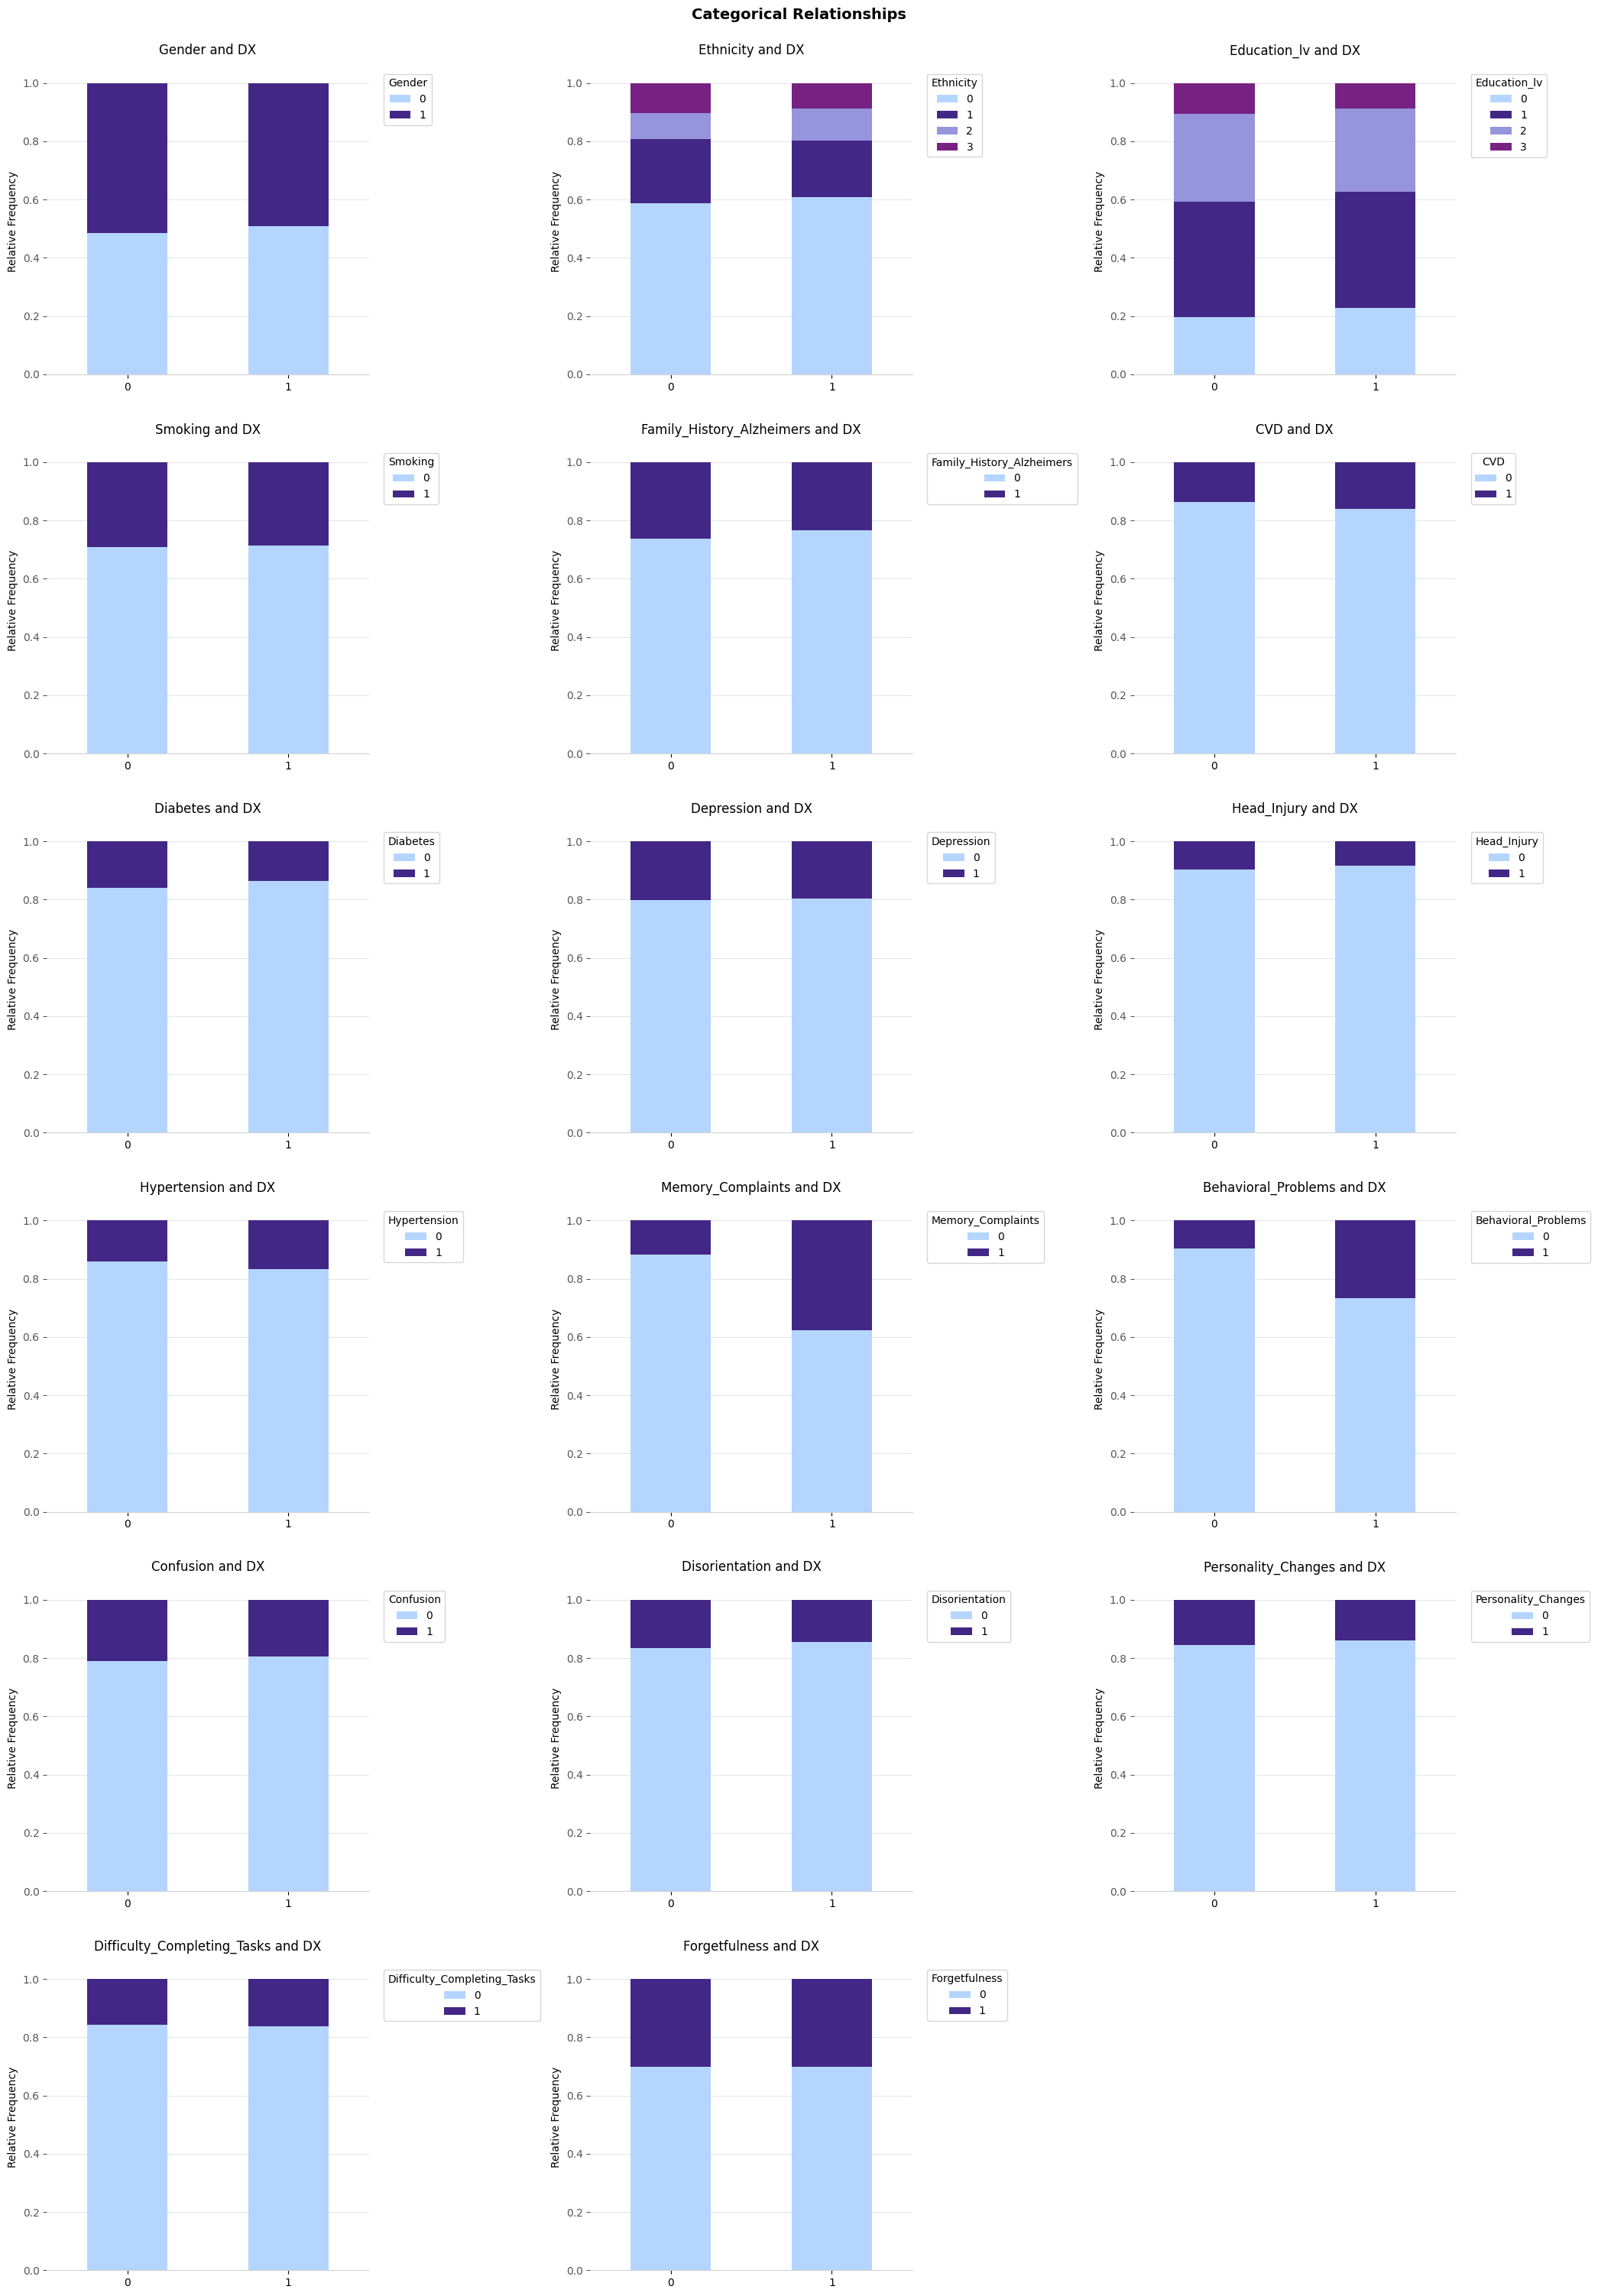

In [6]:
vt.plot_categorical_relationship_stacked(df_main, 'DX', categorical_main, relative = True, palette = palette);

It seems as if Memory_Complaints and Behavioral_Problems are the only variables with some correlation with AD diagnosis.  

Let's confirm this with numbers

In [7]:
dt.categorical_correlation_test(df_main, 'DX', categorical_main)[0]

{'Memory_Complaints': np.float64(1.526605098526405e-45),
 'Behavioral_Problems': np.float64(4.731446795211872e-25)}

For both variables, p-value seems to be way below 0.05. I'll save this variables for further analysis.

### Categorical biomarker_data

[Back to top](#table-of-contents)

In [8]:
df_grouped = df_bm.groupby

In [9]:
bm_classification = dt.classify_by_cardinality(df_bm)
column_selection = bm_classification.loc[bm_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_bm = column_selection.index.to_list()

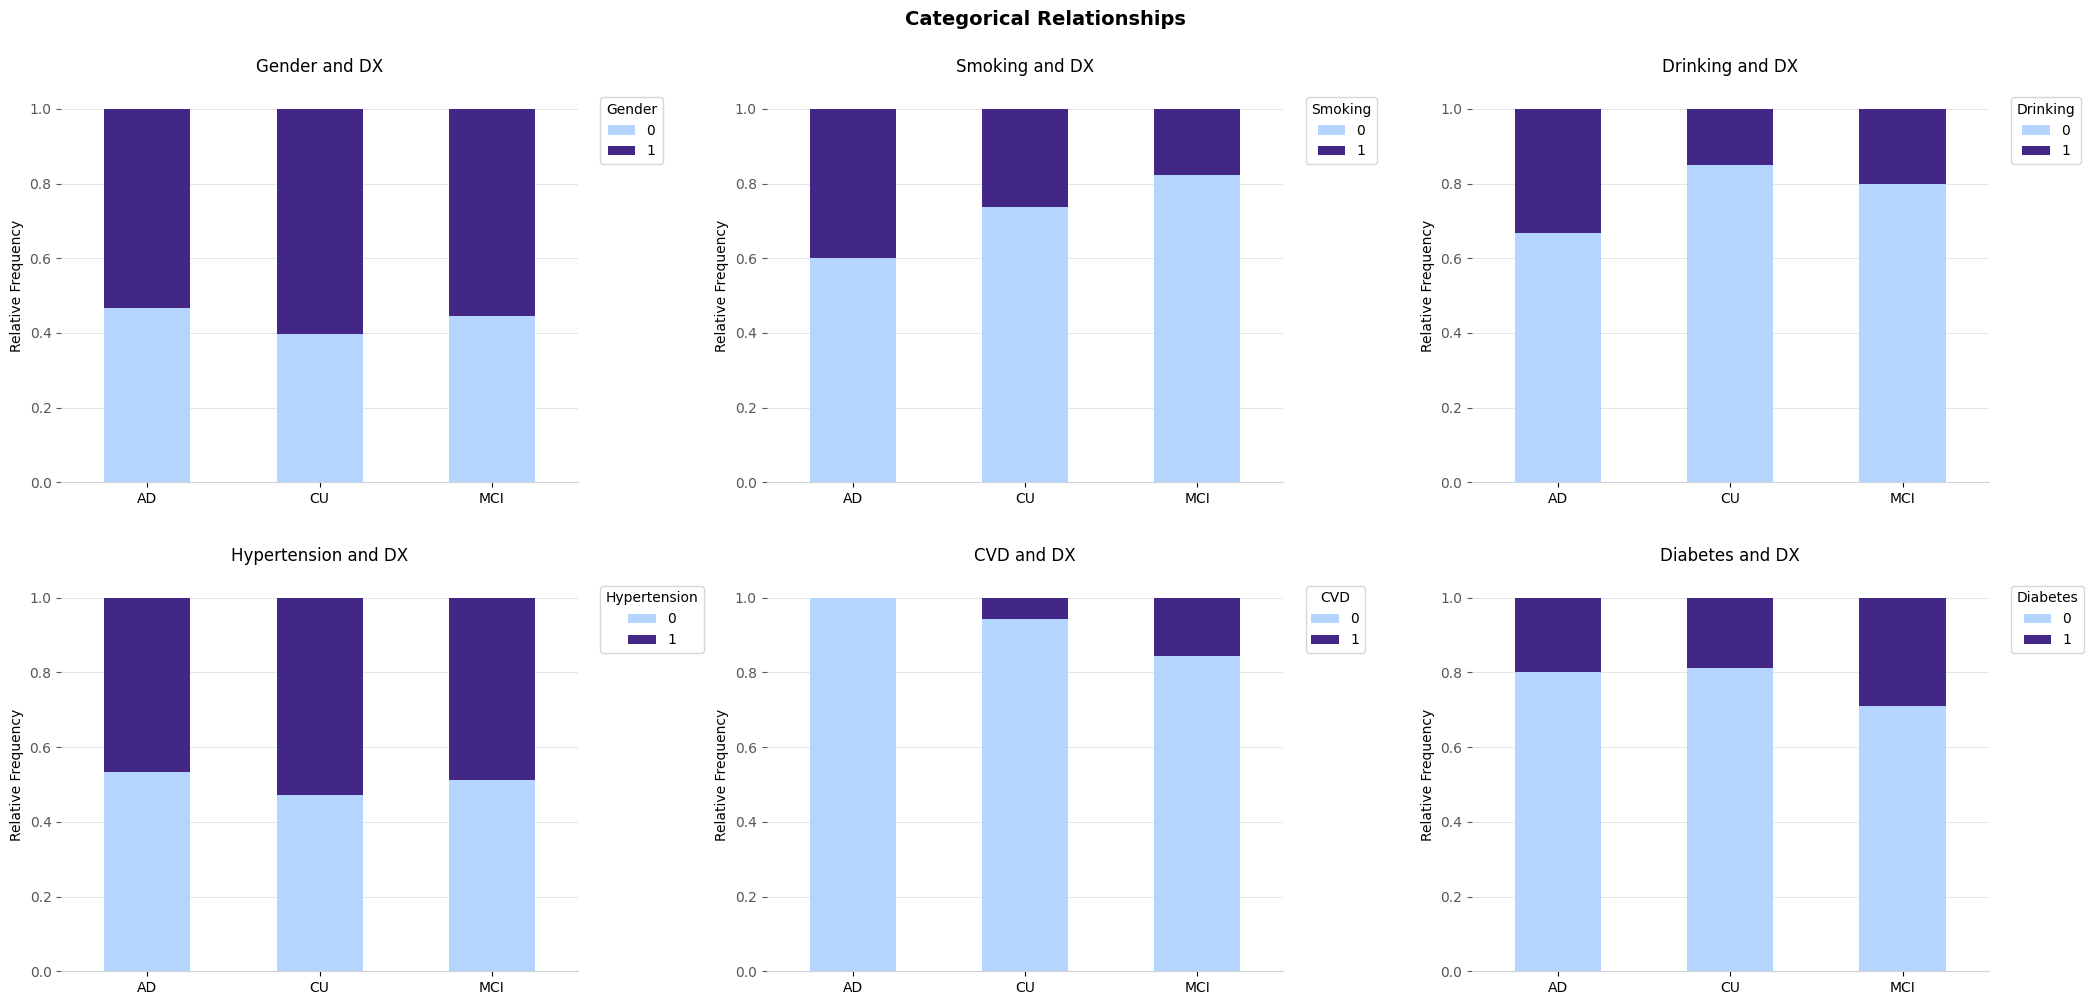

In [10]:
vt.plot_categorical_relationship_stacked(df_bm, 'DX', categorical_bm, relative = True, palette = palette);

In [11]:
bm = dt.categorical_correlation_test(df_bm, 'DX', categorical_bm)

for variable in bm[1]:
    print(f'P-value of {variable}: {bm[1][variable]['p']}')

P-value of Gender: 0.8370382119306571
P-value of Smoking: 0.20971432003792884
P-value of Drinking: 0.28736212258639765
P-value of Hypertension: 0.8825541693908439
P-value of CVD: 0.09860124920531134
P-value of Diabetes: 0.4799930853532808
P-value of DX: 9.585800722276226e-48


It seems there is no correlation in between AD diagnosis and this variables, which reinforces the findings in main_data shown before

### Categorical adni_data

[Back to top](#table-of-contents)

In [12]:
adni_classification = dt.classify_by_cardinality(df_adni)
column_selection = adni_classification.loc[adni_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_adni = column_selection.index.to_list()

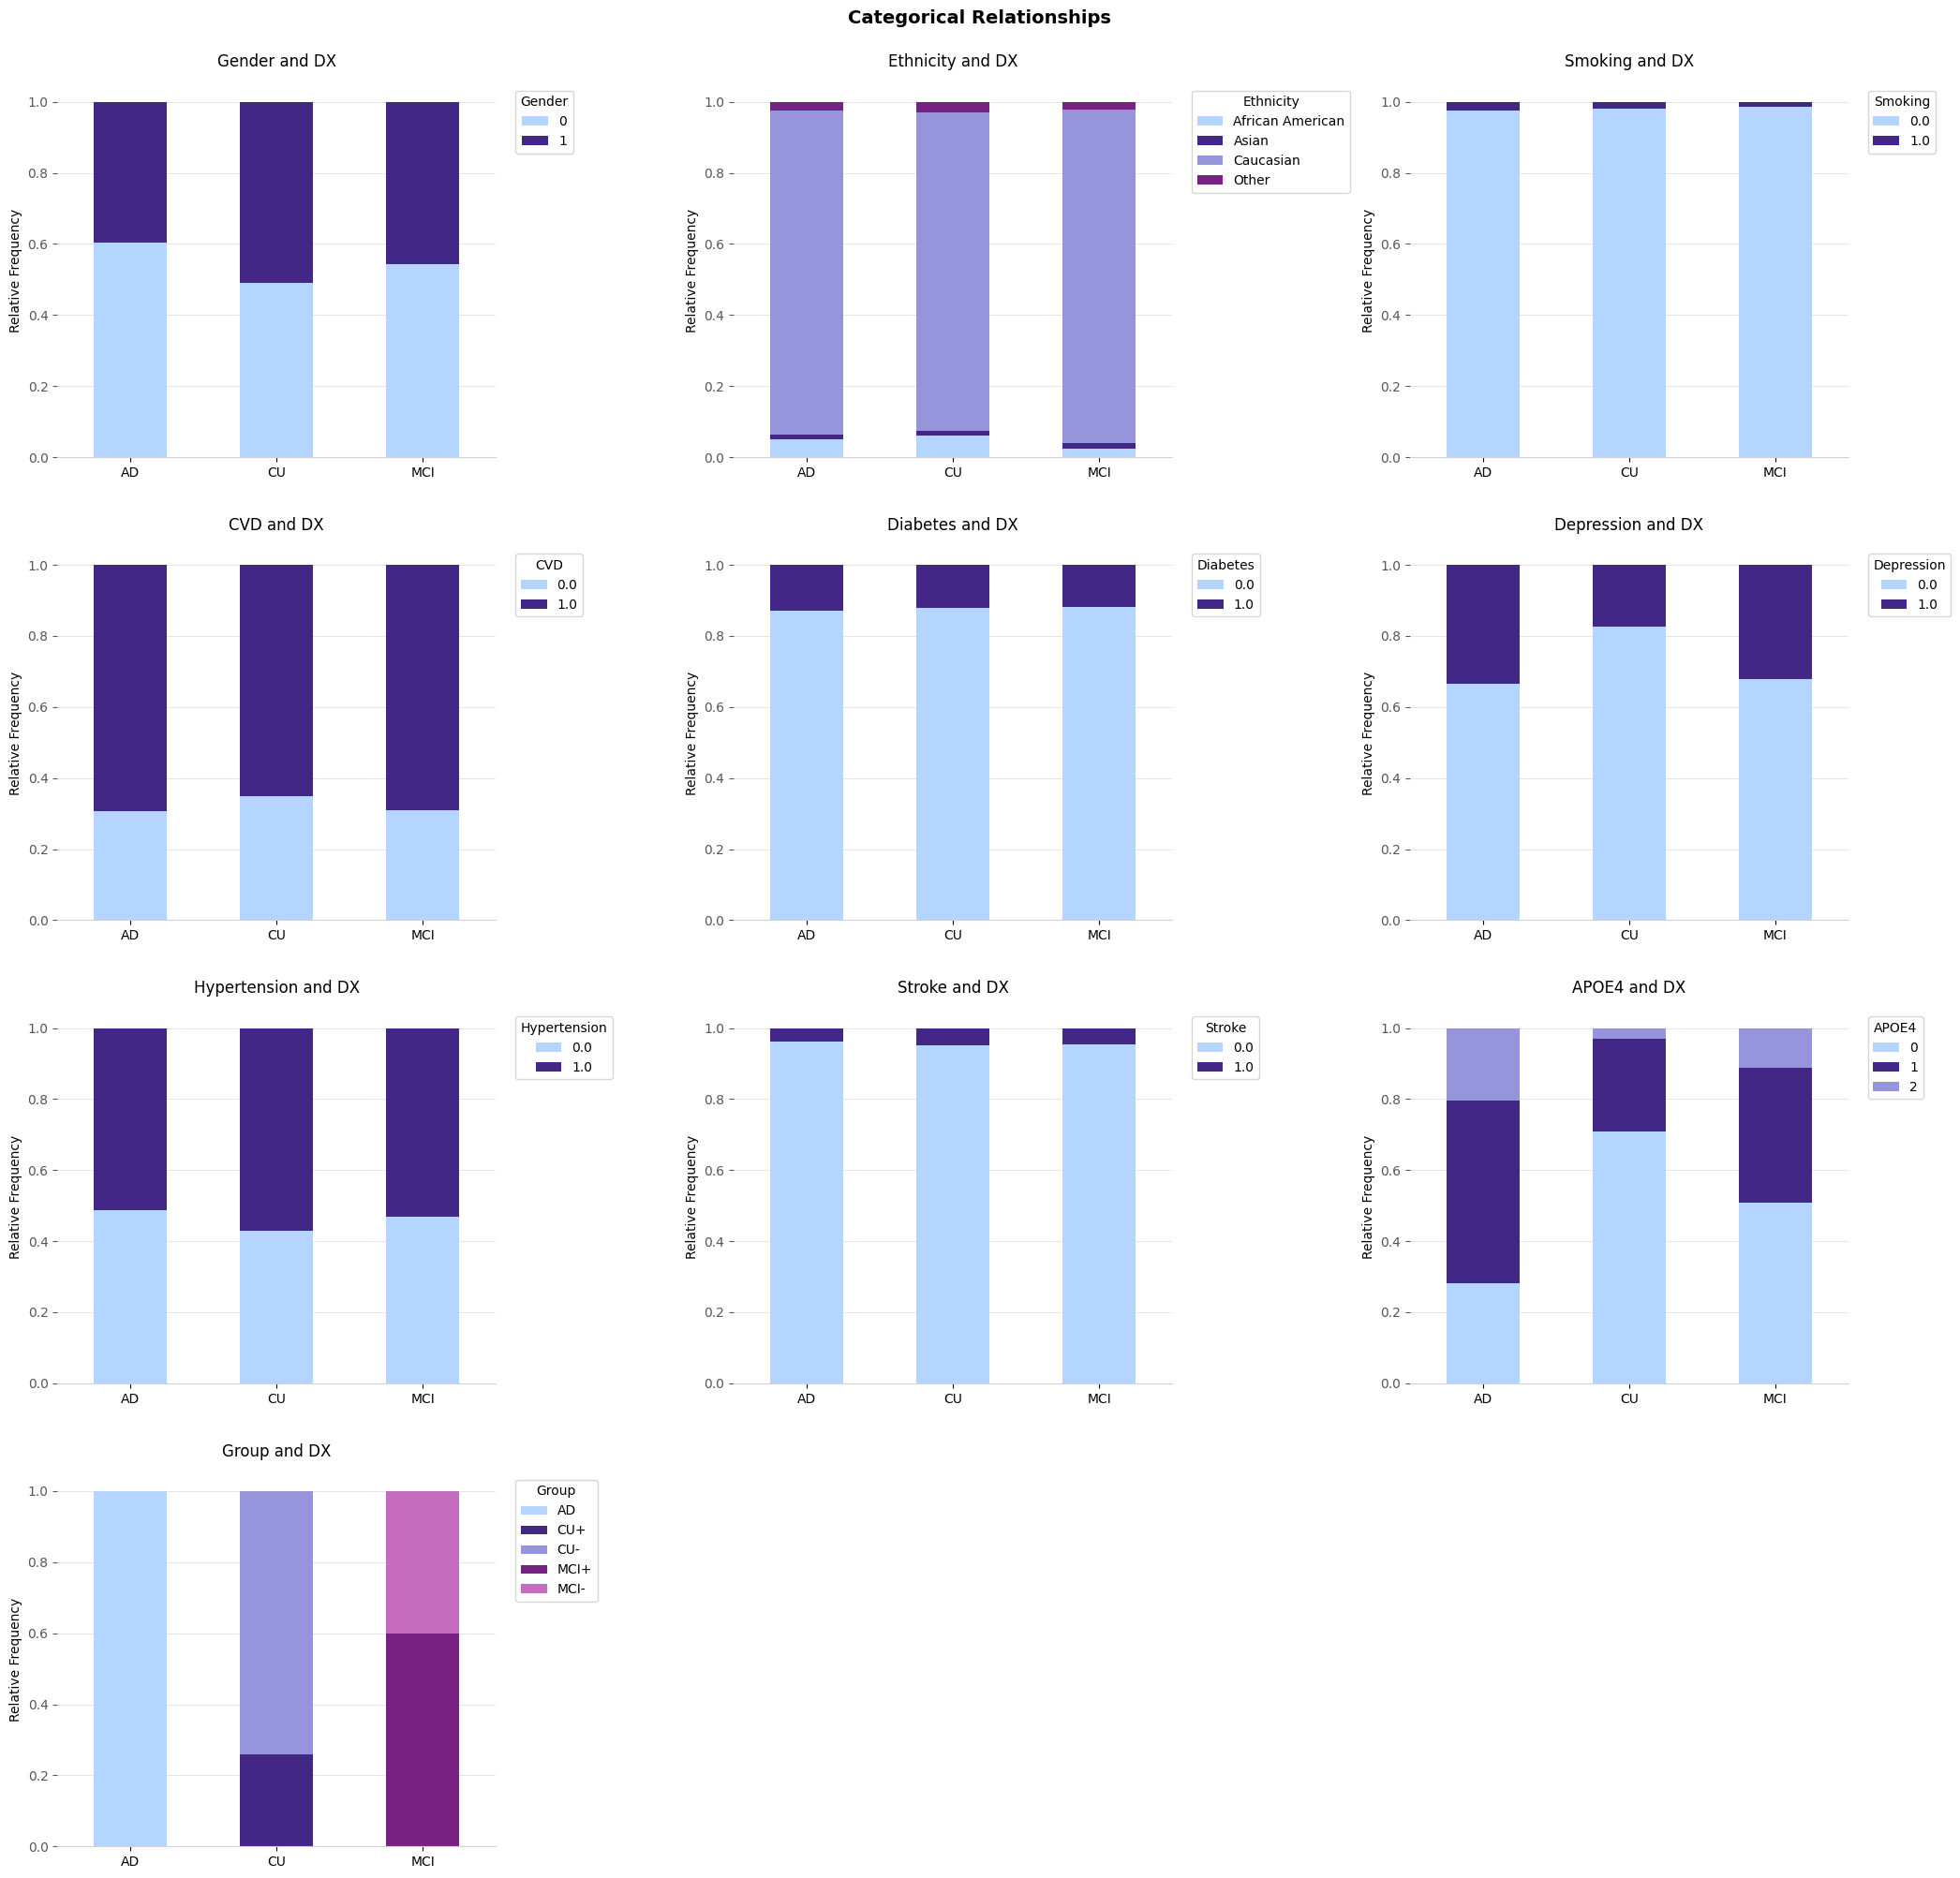

In [13]:
vt.plot_categorical_relationship_stacked(df_adni, 'DX', categorical_adni, relative = True, palette = palette);

In [14]:
adni = dt.categorical_correlation_test(df_adni, 'DX', categorical_adni)
adni[0]

{'Depression': np.float64(0.0005084505525434677),
 'APOE4': np.float64(2.0966632418313937e-10),
 'Group': np.float64(1.3372663595048188e-270)}

In [15]:
for variable in adni[1]:
    print(f'P-value of {variable}: {adni[1][variable]['p']}')

P-value of Gender: 0.20755084919302635
P-value of Ethnicity: 0.5432456191306876
P-value of Smoking: 0.7187147876238187
P-value of CVD: 0.600904642740504
P-value of Diabetes: 0.9749617838905399
P-value of Depression: 0.0005084505525434677
P-value of Hypertension: 0.5921667513320918
P-value of Stroke: 0.9197302794232456
P-value of APOE4: 2.0966632418313937e-10
P-value of DX: 1.9588719066548044e-275
P-value of Group: 1.3372663595048188e-270


In the source dataset, subjets with positive Aβ-related pathological changes (CU+ and MCI+). CU+ subjects were regarded as patients with pre-clinical AD and MCI+ subjects were regarded as patients with prodromal AD.  

**Does regarding CU+ and MCI+ individuals as having AD change this relationships?**

In [16]:
adni_temp = df_adni.copy()
adni_temp.loc[adni_temp['Group'].isin(['CU+', 'MCI+']), 'DX'] = 'AD'

In [17]:
adni_temp.DX.value_counts()

DX
AD     346
CU     148
MCI    145
Name: count, dtype: int64

In [18]:
df_adni.DX.value_counts()

DX
MCI    361
CU     200
AD      78
Name: count, dtype: int64

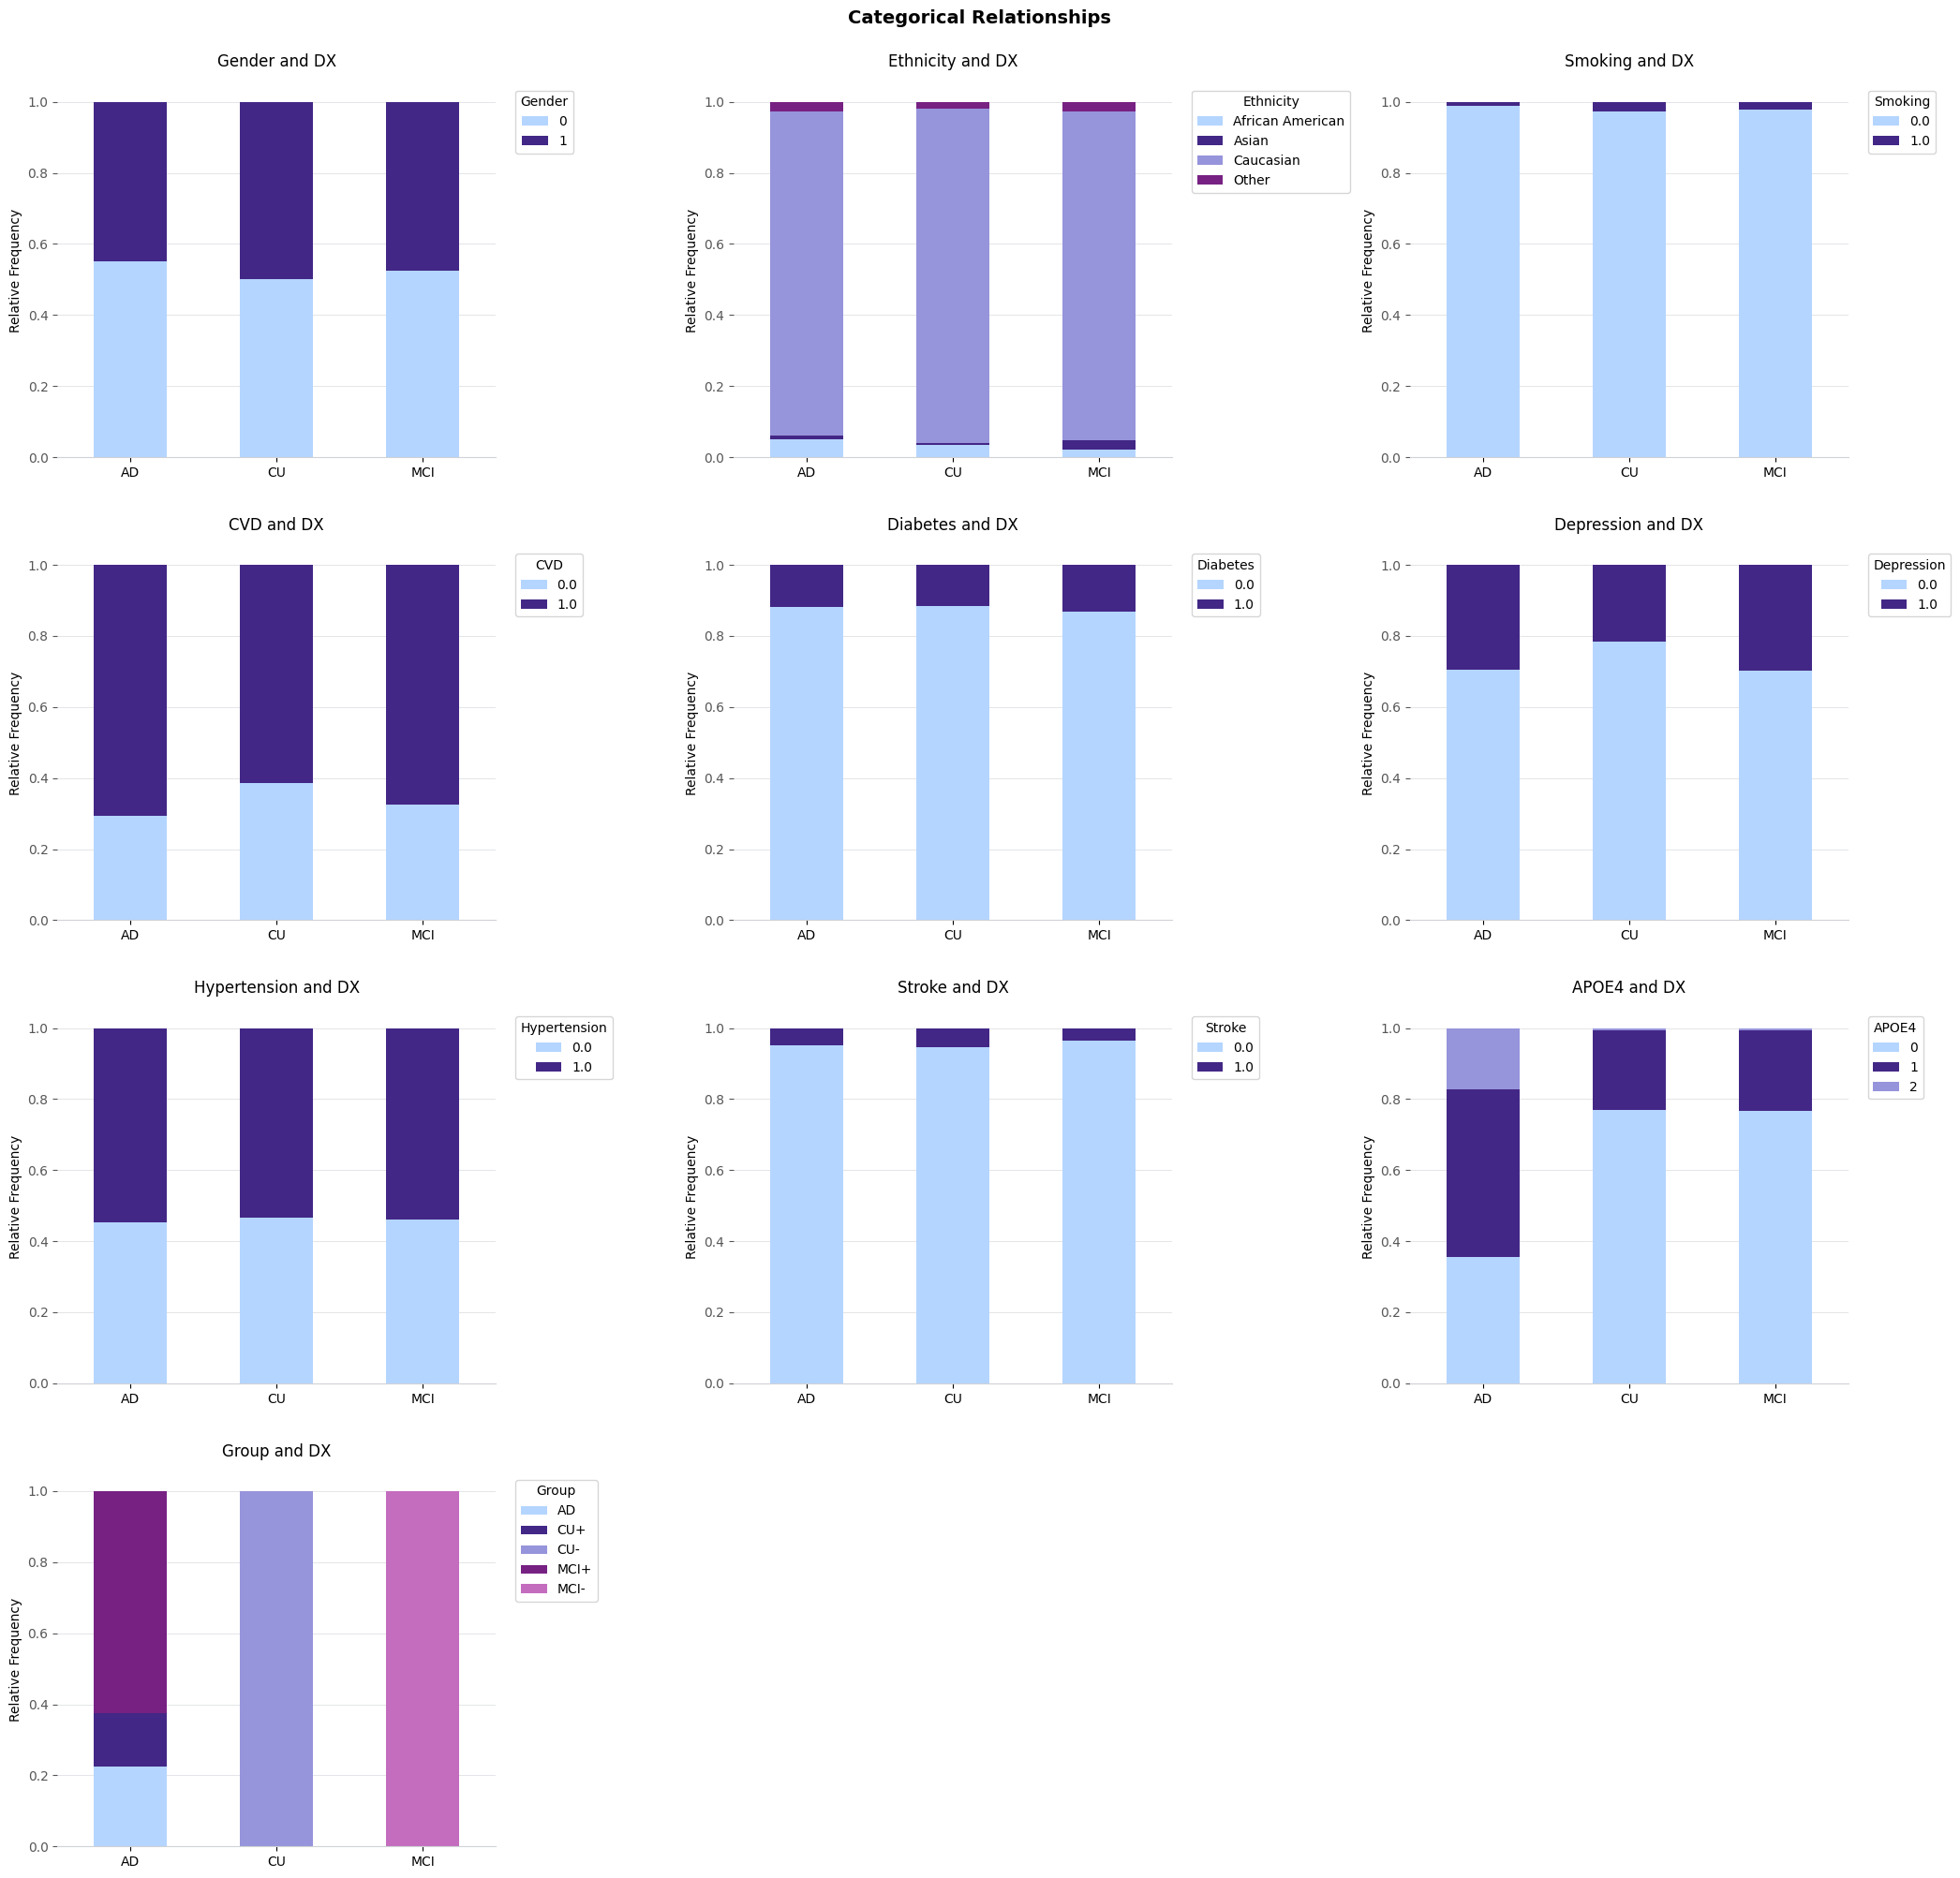

In [19]:
vt.plot_categorical_relationship_stacked(adni_temp, 'DX', categorical_adni, relative = True, palette = palette);

In [20]:
adni = dt.categorical_correlation_test(adni_temp, 'DX', categorical_adni)
adni[0]

{'APOE4': np.float64(2.325646366731605e-25),
 'Group': np.float64(1.3372663595051235e-270)}

In [21]:
for variable in adni[1]:
    print(f'P-value of {variable}: {adni[1][variable]['p']}')

P-value of Gender: 0.5500683987624362
P-value of Ethnicity: 0.5294837114441102
P-value of Smoking: 0.4494275556275438
P-value of CVD: 0.14405126480779337
P-value of Diabetes: 0.9006505620923718
P-value of Depression: 0.16910998041591152
P-value of Hypertension: 0.9635432358926889
P-value of Stroke: 0.7020574454911692
P-value of APOE4: 2.325646366731605e-25
P-value of DX: 1.9588719066548044e-275
P-value of Group: 1.3372663595051235e-270


Regarding CU+ and MCI+ individuals as having AD *changes* the relationship with 'Depression', and it now aligns with the observations found in the other 2 datasets.  

It does not change the relationship between APOE4 and AD, which aligns with the current research findings regarding AD.

## Numerical variables

### Numerical main_data

[Back to top](#table-of-contents)

In [22]:
main_classification = dt.classify_by_cardinality(df_main)
column_selection = main_classification.loc[main_classification['Suggested Type'].isin(['Numerical (discrete)', 'Numerical (continuous)'])]
numerical_main = column_selection.index.to_list()
numerical_main.append('DX')

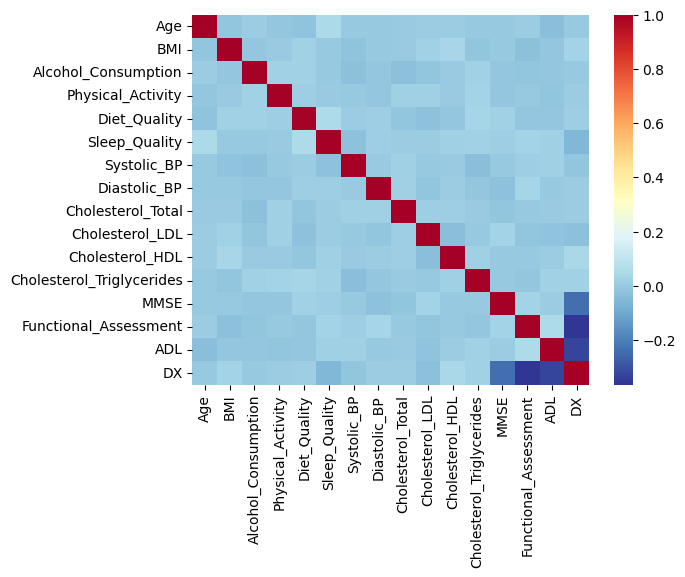

In [23]:
num_main = df_main[numerical_main]
heat_main = sns.heatmap(num_main.corr(), cmap = sns.color_palette('RdYlBu_r', as_cmap = True))

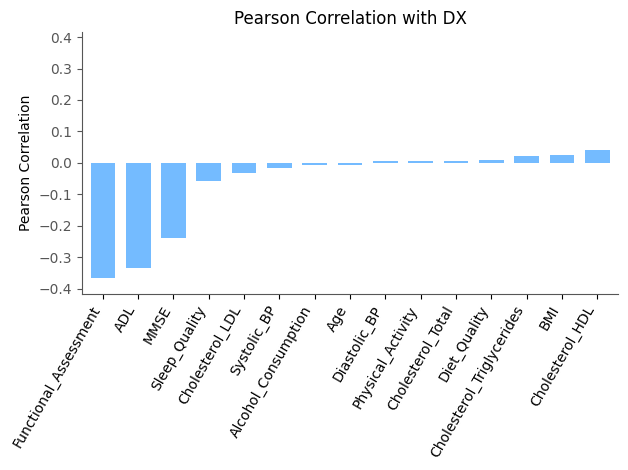

In [24]:
vt.plot_numerical_correlation(num_main, 'DX')

As shown above, the 3 numerical variables that seem correlated to the diagnosis are 'Functional_Assessment', 'ADL' and 'MMSE'.  

Let's confirm this with a Mann-Whitney U test

In [25]:
dt.numerical_correlation_test(num_main, 'DX', ['MMSE', 'ADL', 'Functional_Assessment'])[0]

{'MMSE': np.float64(6.623802197153536e-28),
 'ADL': np.float64(6.05356417761097e-53),
 'Functional_Assessment': np.float64(8.99708993639263e-65)}

Summary:

* 'Functional_Assessment', 'ADL' and 'MMSE' seem to have a statistically significant negative correlation with AD diagnosis

### Numerical biomarker_data

[Back to top](#table-of-contents)

In [26]:
bm_classification = dt.classify_by_cardinality(df_bm)
column_selection = bm_classification.loc[bm_classification['Suggested Type'].isin(['Numerical (discrete)', 'Numerical (continuous)'])]
numerical_bm = column_selection.index.to_list()
numerical_bm.append('DX')

# Transform DX column into binary
num_bm = df_bm[numerical_bm].copy()
num_bm['DX'] = num_bm['DX'].apply(lambda x: 1 if x == 'AD' else 0)

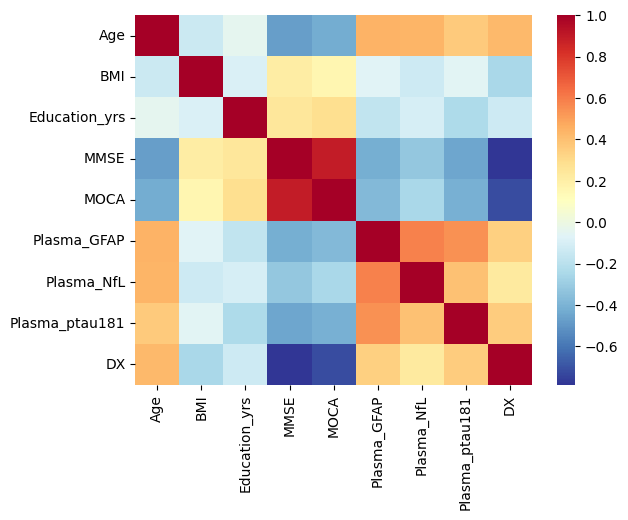

In [27]:
heat_bm = sns.heatmap(num_bm.corr(numeric_only = True), cmap = sns.color_palette('RdYlBu_r', as_cmap = True))

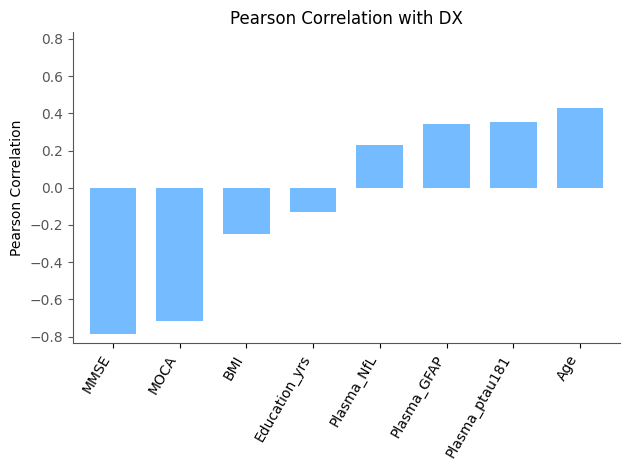

In [28]:
vt.plot_numerical_correlation(num_bm, 'DX')

In [29]:
bm = dt.numerical_correlation_test(num_bm, 'DX', numerical_bm)
bm[0]

{'Age': np.float64(3.663834579186163e-05),
 'BMI': np.float64(0.007399643967585883),
 'MMSE': np.float64(1.5982392265267676e-09),
 'MOCA': np.float64(6.134286240310861e-09),
 'Plasma_GFAP': np.float64(0.007400505319537231),
 'Plasma_NfL': np.float64(0.006190741989904864),
 'Plasma_ptau181': np.float64(8.471373335607175e-05)}

In [30]:
for variable in bm[1]:
    print(f'P-value of {variable}: {bm[1][variable]['p_value']}')

P-value of Age: 3.663834579186163e-05
P-value of BMI: 0.007399643967585883
P-value of Education_yrs: 0.2914055779523942
P-value of MMSE: 1.5982392265267676e-09
P-value of MOCA: 6.134286240310861e-09
P-value of Plasma_GFAP: 0.007400505319537231
P-value of Plasma_NfL: 0.006190741989904864
P-value of Plasma_ptau181: 8.471373335607175e-05
P-value of DX: 3.858457573688159e-26


Summary:

* 'MMSE', 'MOCA', 'BMI' and 'Education_yrs' seem to be negatively correlated to AD diagnosis.
* 'Age', 'Plasma_ptau181', 'Plasma_GFAP' and 'Plasma_NfL' seem to be positively correlated to AD diagnosis.
* All correlations seem to be statistically significant, but I'll focus on 'MMSE' and 'MOCA' for the negative correlations and 'Plasma_ptau181' for the positive correlation as they have the lowest p-values (stronger evidence of a significant correlation). I won't be studying the 'Age' variable any further.

### Numerical adni_data

[Back to top](#table-of-contents)

In [31]:
adni_classification = dt.classify_by_cardinality(df_adni)
column_selection = adni_classification.loc[adni_classification['Suggested Type'].isin(['Numerical (discrete)', 'Numerical (continuous)'])]
numerical_adni = column_selection.index.to_list()
numerical_adni.append('DX')
numerical_adni.append('Group')
num_adni = df_adni[numerical_adni].copy()

# Transform DX column into binary, based on the final considerations from the categorical values exploration
num_adni.loc[num_adni['Group'].isin(['CU+', 'MCI+', 'AD']), 'DX'] = 1
num_adni['DX'] = num_adni['DX'].apply(lambda x: 0 if isinstance(x, str) else x)
num_adni.drop(columns = 'Group', axis = 1, inplace = True)
num_adni

,Age,Education_yrs,MMSE,MOCA,Plasma_ptau181,DX
0,64.8,16,28,28.0,6.777,0
1,83.4,20,29,23.0,37.897,1
2,76.4,18,29,26.0,10.252,0
3,66.0,18,29,25.0,16.576,1
4,82.5,14,28,27.0,7.726,0
...,...,...,...,...,...,...
634,78.9,16,29,28.0,5.788,0
635,81.9,18,30,29.0,5.228,0
636,67.0,12,29,25.0,18.583,0
637,74.3,13,30,29.0,17.408,0


In [32]:
num_adni.DX.value_counts()

DX
1    346
0    293
Name: count, dtype: int64

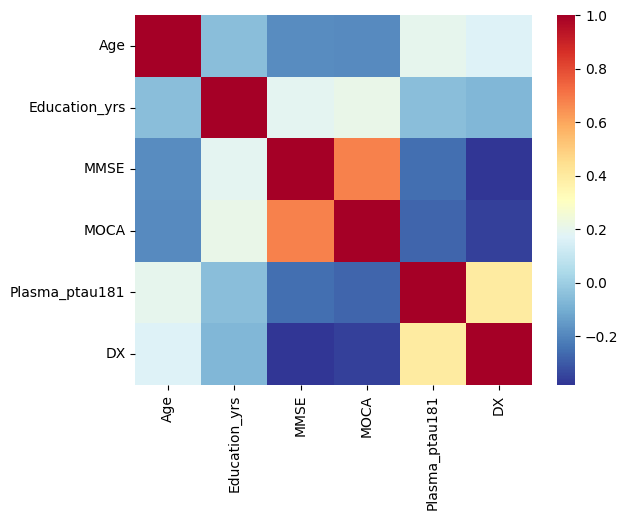

In [33]:
heat_adni = sns.heatmap(num_adni.corr(numeric_only = True), cmap = sns.color_palette('RdYlBu_r', as_cmap = True))

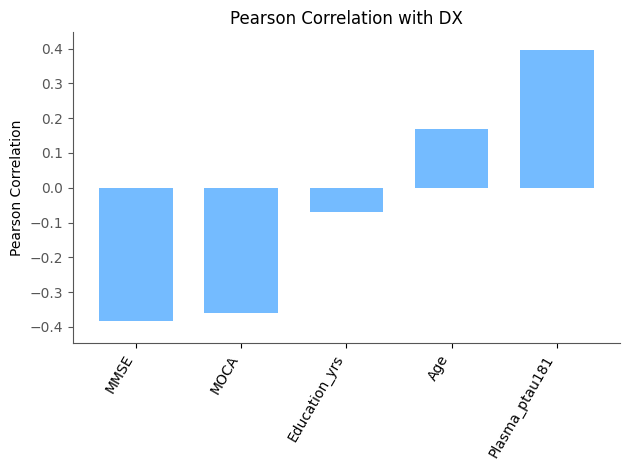

In [34]:
vt.plot_numerical_correlation(num_adni, 'DX')

In [35]:
adni = dt.numerical_correlation_test(num_adni, 'DX', num_adni.columns)
adni[0]

{'Age': np.float64(9.569204325325786e-06),
 'MMSE': np.float64(4.236974542385673e-20),
 'MOCA': np.float64(7.043709120538139e-20),
 'Plasma_ptau181': np.float64(8.824002683153643e-27)}

In [36]:
for variable in adni[1]:
    print(f'P-value of {variable}: {adni[1][variable]['p_value']}')

P-value of Age: 9.569204325325786e-06
P-value of Education_yrs: 0.0734948462927079
P-value of MMSE: 4.236974542385673e-20
P-value of MOCA: 7.043709120538139e-20
P-value of Plasma_ptau181: 8.824002683153643e-27
P-value of DX: 9.154809738134736e-141


Summary:

* 'MMSE', 'MOCA' and 'Education_yers' seem to be negatively correlated to AD diagnosis.
* 'Plasma_ptau181' and 'Age' seem to be positively correlated to AD diagnosis.
* The correlation of 'MMSE', 'MOCA', 'Plasma_ptau181' and 'Age' with AD diagnosis seems to be statistically significant and will be studied in more detail, but I won't be studying the 'Age' variable any further.
* The correlations in this dataset seem congruent with the ones from the biomarker data.